## <span style="color: #e6b450">1 | </span><span style="color: #4a9fb8">Libraries</span>

In [1]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader

### <span style="color: #e6b450">1.1 | </span><span style="color: #7fb8d0">Importing data and cleaning it</span>

In [2]:
df = pd.read_csv('/kaggle/input/google-stock-price-2018-2025/Google_Stock_Price.csv', parse_dates=['date'])
df

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,GOOG,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
1,GOOG,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2,GOOG,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125519,0.0,0.0
3,GOOG,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
4,GOOG,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1756,GOOG,2024-12-24,196.169998,197.669998,195.197998,197.570007,6809800,197.570007,0.0,0.0
1757,GOOG,2024-12-26,196.740005,198.160004,195.869995,197.100006,7907900,197.100006,0.0,0.0
1758,GOOG,2024-12-27,196.470001,196.800003,191.972000,194.039993,14693000,194.039993,0.0,0.0
1759,GOOG,2024-12-30,190.865005,193.779999,190.360001,192.690002,12209500,192.690002,0.0,0.0


In [3]:
df.columns

Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'adjclose',
       'dividends', 'splits'],
      dtype='object')

In [4]:
df.drop('symbol', axis=1, inplace=True)
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adjclose',
       'dividends', 'splits'],
      dtype='object')

## <span style="color: #e6b450">2 | </span><span style="color: #4a9fb8">Pre processing</span>

### <span style="color: #e6b450">2.1 | </span><span style="color: #7fb8d0">Information</span>

In [5]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1761 non-null   datetime64[ns]
 1   open       1761 non-null   float64       
 2   high       1761 non-null   float64       
 3   low        1761 non-null   float64       
 4   close      1761 non-null   float64       
 5   volume     1761 non-null   int64         
 6   adjclose   1761 non-null   float64       
 7   dividends  1761 non-null   float64       
 8   splits     1761 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 123.9 KB


In [6]:
print("\nStatistical summary:")
df.describe()


Statistical summary:


,date,open,high,low,close,volume,adjclose,dividends,splits
count,1761,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03,1761.000000,1761.000000,1761.000000
mean,2021-07-01 15:36:17.172061440,102.021411,103.171589,100.982265,102.092157,2.859376e+07,101.754831,0.000341,0.011357
min,2018-01-02 00:00:00,48.695000,50.176998,48.505501,48.811001,6.809800e+06,48.636250,0.000000,0.000000
25%,2019-10-02 00:00:00,61.463001,62.043999,60.938499,61.496498,1.992200e+07,61.276325,0.000000,0.000000
50%,2021-07-01 00:00:00,100.059998,101.658997,99.169998,100.739998,2.561200e+07,100.379326,0.000000,0.000000
75%,2023-03-31 00:00:00,135.570007,137.070999,134.183502,135.990005,3.304600e+07,135.503128,0.000000,0.000000
max,2024-12-31 00:00:00,198.529999,202.880005,196.690002,198.160004,1.241400e+08,198.160004,0.200000,20.000000
std,NaN,39.637483,40.020994,39.274690,39.637305,1.317064e+07,39.547744,0.008250,0.476596


In [7]:
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


date         0
open         0
high         0
low          0
close        0
volume       0
adjclose     0
dividends    0
splits       0
dtype: int64

### <span style="color: #e6b450">2.2 | </span><span style="color: #7fb8d0">Plot 1: Line plot of the closing price over time</span>

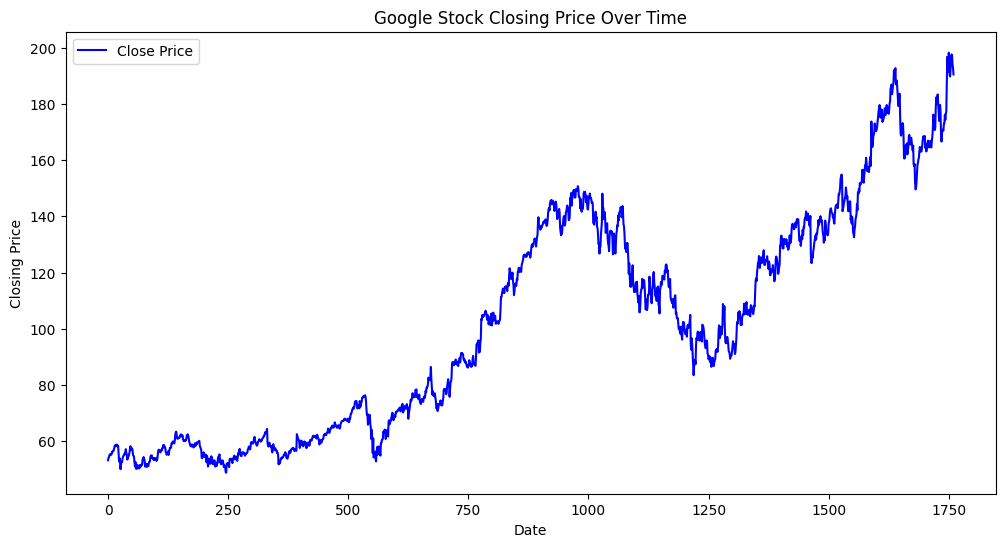

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.title('Google Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### <span style="color: #e6b450">2.3 | </span><span style="color: #7fb8d0">Plot 2: Correlation heatmap to show relationships between features</span>

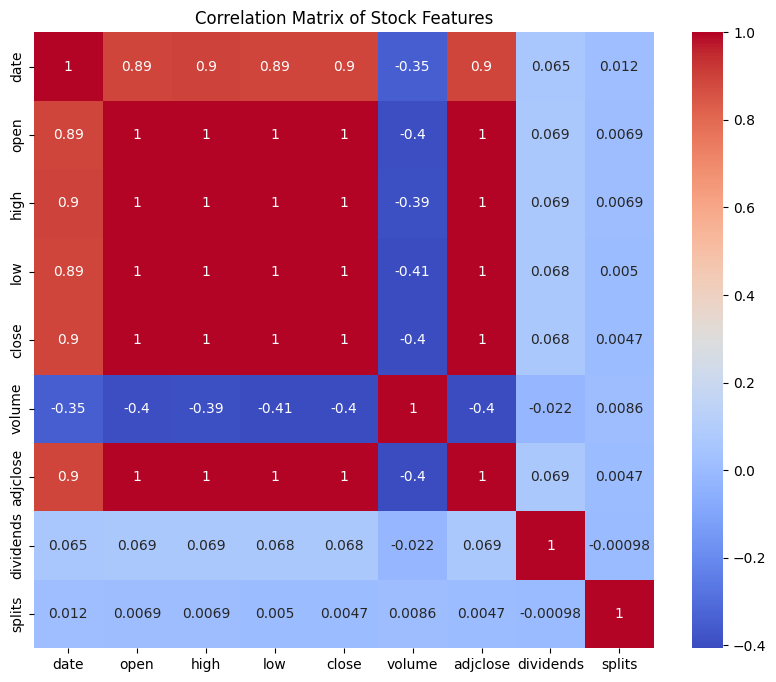

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Features')
plt.show()

### <span style="color: #e6b450">2.4 | </span><span style="color: #7fb8d0">Plot 3: Scatter plot to examine the relationship between Close Price and Volume</span>

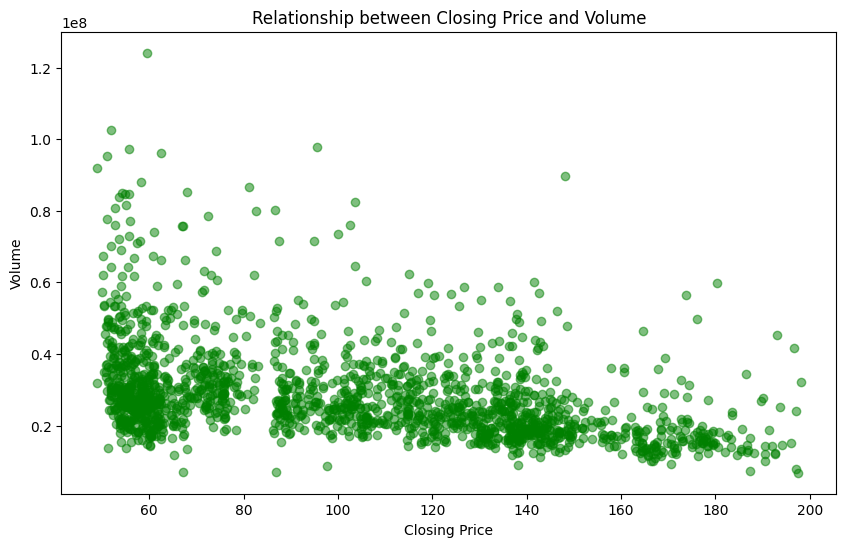

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['close'], df['volume'], alpha=0.5, color='green')
plt.title('Relationship between Closing Price and Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.show()

### <span style="color: #e6b450">2.5 | </span><span style="color: #7fb8d0">Normalizing the "Close" column</span>

In [11]:
close_data = df[['close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
close_data_norm = scaler.fit_transform(close_data)

## <span style="color: #e6b450">3 | </span><span style="color: #4a9fb8">Creating the LSTM models</span>

In [12]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60
X, y = create_sequences(close_data_norm, seq_length)

train_size = int(len(X) * 0.8)    # Split into training and testing sets (80% train, 20% test)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

### <span style="color: #e6b450">3.1 | </span><span style="color: #7fb8d0">Simple LSTM Model: 1 LSTM layer, small hidden size</span>

In [13]:
class SimpleLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1):
        super(SimpleLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        # x: (batch_size, seq_length, input_size)
        out, _ = self.lstm(x)
        # Only take the output from the last time step
        out = self.fc(out[:, -1, :])
        return out

### <span style="color: #e6b450">3.2 | </span><span style="color: #7fb8d0">Medium LSTM Model: 2 LSTM layers, larger hidden size, with dropout</span>

In [14]:
class MediumLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=100, num_layers=2, dropout=0.2):
        super(MediumLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

### <span style="color: #e6b450">3.3 | </span><span style="color: #7fb8d0">Complex LSTM Model: 3 LSTM layers, even larger hidden size, with higher dropout</span>

In [15]:
class ComplexLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=150, num_layers=3, dropout=0.5):
        super(ComplexLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

## <span style="color: #e6b450">4 | </span><span style="color: #4a9fb8">Training Setup</span>

In [16]:
def train_model(model, train_loader, num_epochs=20, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    model.train()
    
    for epoch in range(num_epochs):
        epoch_losses = []
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {np.mean(epoch_losses):.6f}")
    return model

### <span style="color: #e6b450">4.1 | </span><span style="color: #7fb8d0">Training Simple Models</span>

In [17]:
simple_model = SimpleLSTM()
print("Training Simple LSTM Model")
simple_model = train_model(simple_model, train_loader, num_epochs=100)

Training Simple LSTM Model
Epoch [1/100], Loss: 0.047475
Epoch [2/100], Loss: 0.022998
Epoch [3/100], Loss: 0.005328
Epoch [4/100], Loss: 0.001982
Epoch [5/100], Loss: 0.000957
Epoch [6/100], Loss: 0.000592
Epoch [7/100], Loss: 0.000545
Epoch [8/100], Loss: 0.000487
Epoch [9/100], Loss: 0.000471
Epoch [10/100], Loss: 0.000469
Epoch [11/100], Loss: 0.000462
Epoch [12/100], Loss: 0.000483
Epoch [13/100], Loss: 0.000493
Epoch [14/100], Loss: 0.000450
Epoch [15/100], Loss: 0.000423
Epoch [16/100], Loss: 0.000448
Epoch [17/100], Loss: 0.000455
Epoch [18/100], Loss: 0.000495
Epoch [19/100], Loss: 0.000437
Epoch [20/100], Loss: 0.000424
Epoch [21/100], Loss: 0.000403
Epoch [22/100], Loss: 0.000410
Epoch [23/100], Loss: 0.000385
Epoch [24/100], Loss: 0.000414
Epoch [25/100], Loss: 0.000419
Epoch [26/100], Loss: 0.000391
Epoch [27/100], Loss: 0.000379
Epoch [28/100], Loss: 0.000374
Epoch [29/100], Loss: 0.000390
Epoch [30/100], Loss: 0.000371
Epoch [31/100], Loss: 0.000387
Epoch [32/100], Loss:

### <span style="color: #e6b450">4.2 | </span><span style="color: #7fb8d0">Training Medium Models</span>

In [18]:
medium_model = MediumLSTM()
print("\nTraining Medium LSTM Model")
medium_model = train_model(medium_model, train_loader, num_epochs=100)


Training Medium LSTM Model
Epoch [1/100], Loss: 0.044924
Epoch [2/100], Loss: 0.014364
Epoch [3/100], Loss: 0.001963
Epoch [4/100], Loss: 0.000959
Epoch [5/100], Loss: 0.000714
Epoch [6/100], Loss: 0.000639
Epoch [7/100], Loss: 0.000693
Epoch [8/100], Loss: 0.000639
Epoch [9/100], Loss: 0.000659
Epoch [10/100], Loss: 0.000694
Epoch [11/100], Loss: 0.000592
Epoch [12/100], Loss: 0.000630
Epoch [13/100], Loss: 0.000609
Epoch [14/100], Loss: 0.000613
Epoch [15/100], Loss: 0.000628
Epoch [16/100], Loss: 0.000627
Epoch [17/100], Loss: 0.000569
Epoch [18/100], Loss: 0.000586
Epoch [19/100], Loss: 0.000596
Epoch [20/100], Loss: 0.000576
Epoch [21/100], Loss: 0.000561
Epoch [22/100], Loss: 0.000548
Epoch [23/100], Loss: 0.000524
Epoch [24/100], Loss: 0.000515
Epoch [25/100], Loss: 0.000530
Epoch [26/100], Loss: 0.000535
Epoch [27/100], Loss: 0.000555
Epoch [28/100], Loss: 0.000526
Epoch [29/100], Loss: 0.000479
Epoch [30/100], Loss: 0.000516
Epoch [31/100], Loss: 0.000627
Epoch [32/100], Loss

### <span style="color: #e6b450">4.3 | </span><span style="color: #7fb8d0">Training Complex Models</span>

In [19]:
complex_model = ComplexLSTM()
print("\nTraining Complex LSTM Model")
complex_model = train_model(complex_model, train_loader, num_epochs=100)


Training Complex LSTM Model
Epoch [1/100], Loss: 0.041168
Epoch [2/100], Loss: 0.009939
Epoch [3/100], Loss: 0.001869
Epoch [4/100], Loss: 0.001375
Epoch [5/100], Loss: 0.001174
Epoch [6/100], Loss: 0.001154
Epoch [7/100], Loss: 0.001002
Epoch [8/100], Loss: 0.001108
Epoch [9/100], Loss: 0.001006
Epoch [10/100], Loss: 0.000908
Epoch [11/100], Loss: 0.000944
Epoch [12/100], Loss: 0.000872
Epoch [13/100], Loss: 0.000932
Epoch [14/100], Loss: 0.001029
Epoch [15/100], Loss: 0.000855
Epoch [16/100], Loss: 0.000907
Epoch [17/100], Loss: 0.000923
Epoch [18/100], Loss: 0.000965
Epoch [19/100], Loss: 0.000888
Epoch [20/100], Loss: 0.000949
Epoch [21/100], Loss: 0.000817
Epoch [22/100], Loss: 0.000821
Epoch [23/100], Loss: 0.000831
Epoch [24/100], Loss: 0.000796
Epoch [25/100], Loss: 0.000800
Epoch [26/100], Loss: 0.000884
Epoch [27/100], Loss: 0.000751
Epoch [28/100], Loss: 0.000795
Epoch [29/100], Loss: 0.000749
Epoch [30/100], Loss: 0.000779
Epoch [31/100], Loss: 0.000805
Epoch [32/100], Los

## <span style="color: #e6b450">5 | </span><span style="color: #4a9fb8">Make Predictions on Test Data</span>

In [20]:
def predict(model, X_data):
    model.eval()
    with torch.no_grad():
        predictions = model(X_data).detach().numpy()
    return predictions

pred_simple = predict(simple_model, X_test_tensor)
pred_medium = predict(medium_model, X_test_tensor)
pred_complex = predict(complex_model, X_test_tensor)

y_test_inv = scaler.inverse_transform(y_test)
pred_simple_inv = scaler.inverse_transform(pred_simple)
pred_medium_inv = scaler.inverse_transform(pred_medium)
pred_complex_inv = scaler.inverse_transform(pred_complex)

test_dates = df['date'].values[-len(y_test):]

## <span style="color: #e6b450">6 | </span><span style="color: #4a9fb8">Plotting the Results</span>

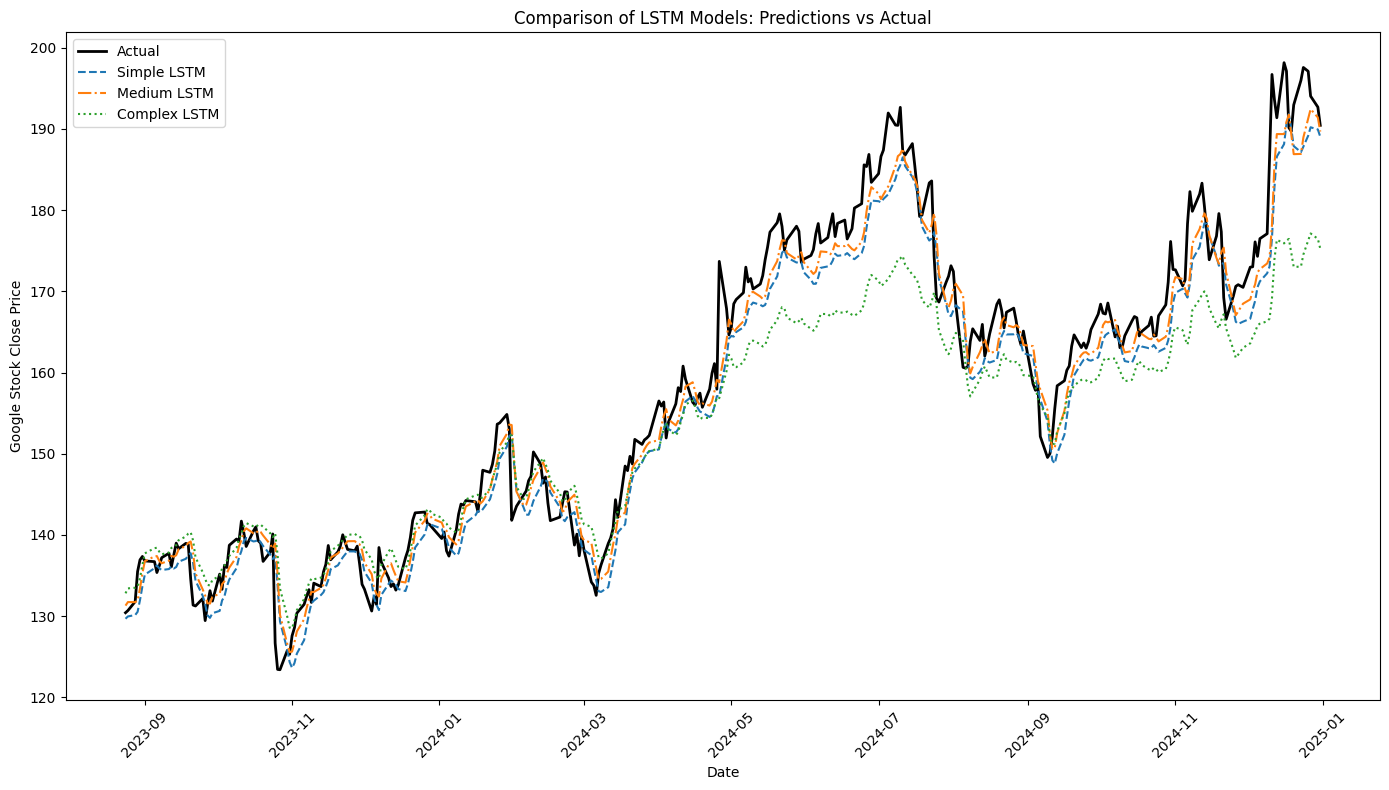

In [21]:
plt.figure(figsize=(14, 8))

plt.plot(test_dates, y_test_inv, label='Actual', color='black', linewidth=2)
plt.plot(test_dates, pred_simple_inv, label='Simple LSTM', linestyle='--')
plt.plot(test_dates, pred_medium_inv, label='Medium LSTM', linestyle='-.')
plt.plot(test_dates, pred_complex_inv, label='Complex LSTM', linestyle=':')
plt.title("Comparison of LSTM Models: Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Google Stock Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <span style="color: #e6b450">6.1 | </span><span style="color: #7fb8d0">Individual plots for each model</span>

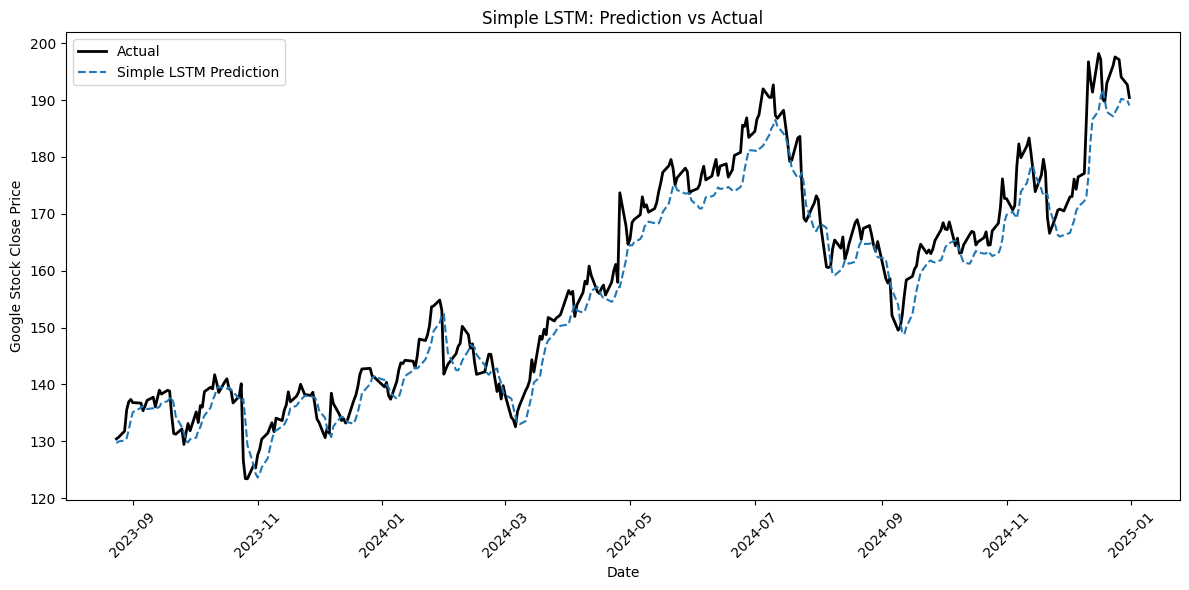

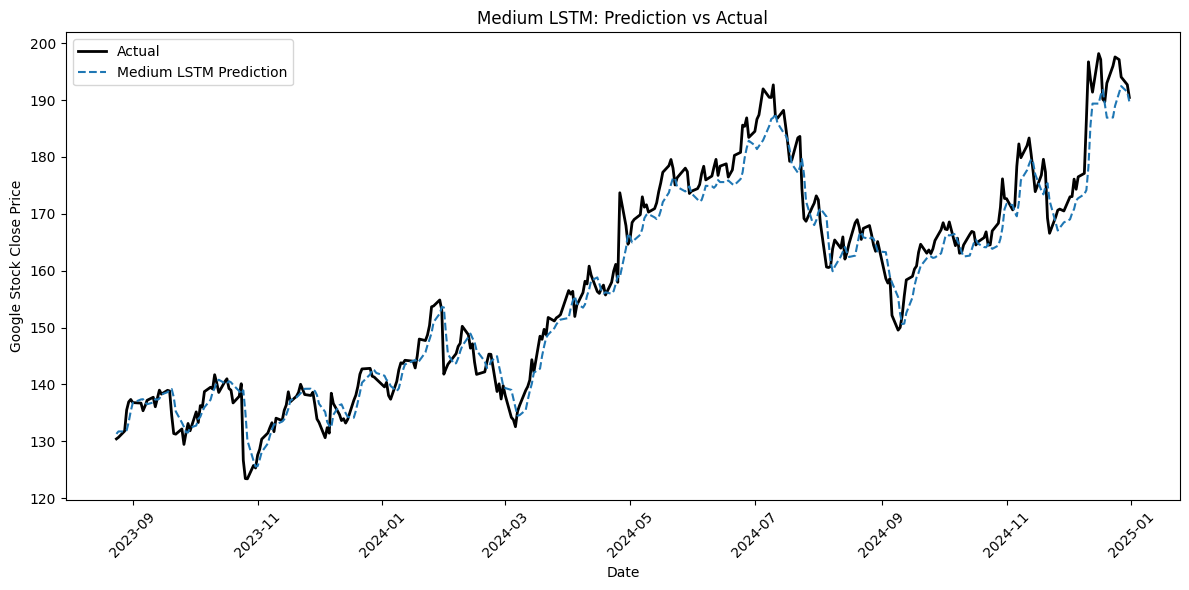

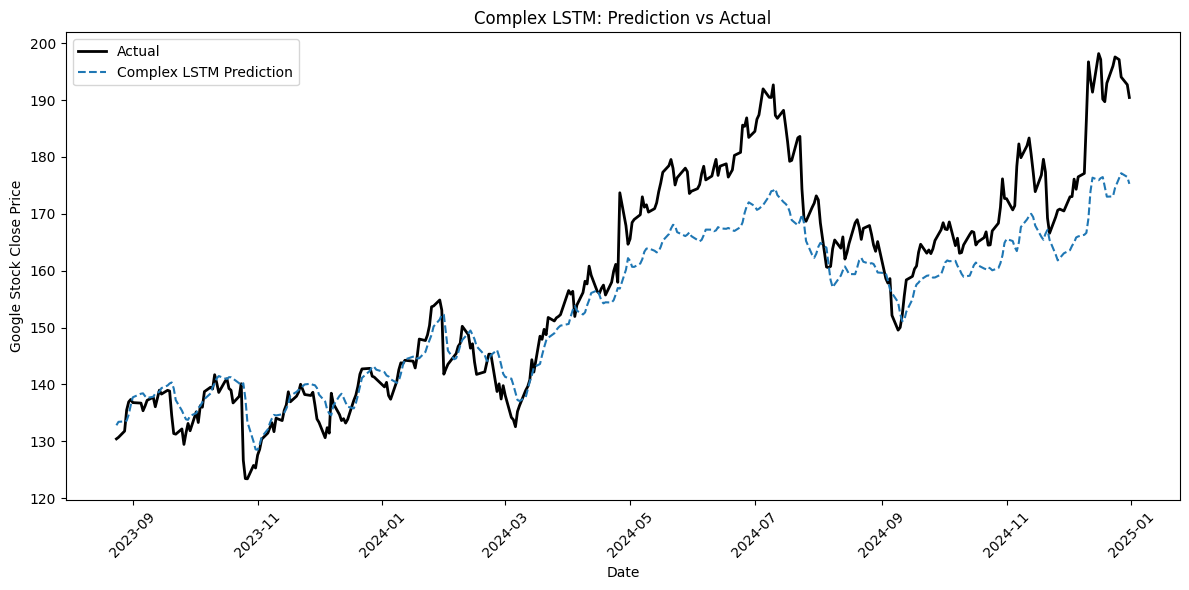

In [22]:
models = [('Simple LSTM', pred_simple_inv),
          ('Medium LSTM', pred_medium_inv),
          ('Complex LSTM', pred_complex_inv)]

for name, pred in models:
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, y_test_inv, label='Actual', color='black', linewidth=2)
    plt.plot(test_dates, pred, label=f'{name} Prediction', linestyle='--')
    plt.title(f"{name}: Prediction vs Actual")
    plt.xlabel("Date")
    plt.ylabel("Google Stock Close Price")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## <span style="color: #e6b450">7 | </span><span style="color: #4a9fb8">Conclusion</span>

So as it obvoius the **`Simple Model`** is more efficient here, completely as same as the TensorFlow modeling.

## <span style="color: #e6b450">8 | </span><span style="color: #4a9fb8">Forecasting the next 10 days</span>

In [23]:
import torch

last_sequence = close_data_norm[-seq_length:]
last_sequence_tensor = torch.from_numpy(last_sequence).float().unsqueeze(0)

def forecast_future(model, init_seq, forecast_days=10):
    """
    Forecast the next forecast_days values using a trained LSTM model.
    Args:
        model: trained PyTorch model.
        init_seq: tensor of shape (1, seq_length, 1) used as the initial input.
        forecast_days: number of days to forecast.
    Returns:
        A numpy array of forecasted normalized values.
    """
    model.eval()
    predictions = []
    current_seq = init_seq.clone()
    with torch.no_grad():
        for _ in range(forecast_days):
            pred = model(current_seq)
            predictions.append(pred.item())
            pred_tensor = pred.view(1, 1, 1)
            current_seq = torch.cat((current_seq[:, 1:, :], pred_tensor), dim=1)
    return np.array(predictions)

forecast_days = 10

forecast_simple = forecast_future(simple_model, last_sequence_tensor, forecast_days)
forecast_medium = forecast_future(medium_model, last_sequence_tensor, forecast_days)
forecast_complex = forecast_future(complex_model, last_sequence_tensor, forecast_days)

forecast_simple_inv = scaler.inverse_transform(forecast_simple.reshape(-1, 1))
forecast_medium_inv = scaler.inverse_transform(forecast_medium.reshape(-1, 1))
forecast_complex_inv = scaler.inverse_transform(forecast_complex.reshape(-1, 1))

last_date = pd.to_datetime(df['date'].iloc[-1])
forecast_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=forecast_days)

### <span style="color: #e6b450">8.1 | </span><span style="color: #7fb8d0">Plot the Forecasts</span>

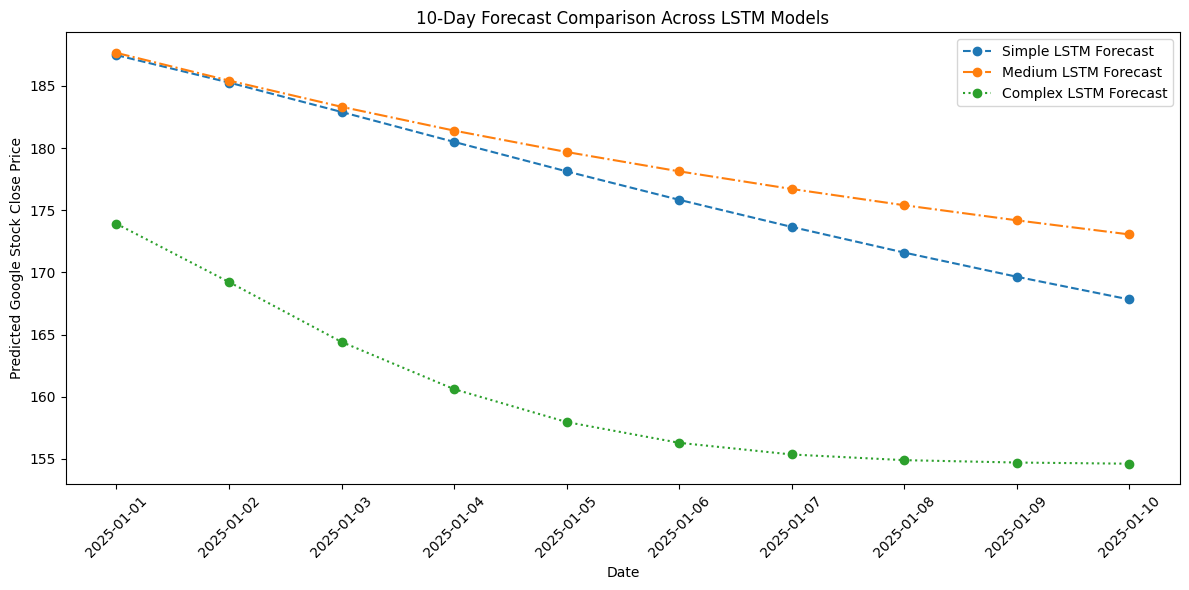

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, forecast_simple_inv, marker='o', linestyle='--', label='Simple LSTM Forecast')
plt.plot(forecast_dates, forecast_medium_inv, marker='o', linestyle='-.', label='Medium LSTM Forecast')
plt.plot(forecast_dates, forecast_complex_inv, marker='o', linestyle=':', label='Complex LSTM Forecast')
plt.title("10-Day Forecast Comparison Across LSTM Models")
plt.xlabel("Date")
plt.ylabel("Predicted Google Stock Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <span style="color: #e6b450">8.2 | </span><span style="color: #7fb8d0">Print Forecast Values for Inspection</span>

In [25]:
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Simple LSTM': forecast_simple_inv.flatten(),
    'Medium LSTM': forecast_medium_inv.flatten(),
    'Complex LSTM': forecast_complex_inv.flatten()
})
print("Forecasted values for the next 10 days:")
print(forecast_df)

Forecasted values for the next 10 days:
        Date  Simple LSTM  Medium LSTM  Complex LSTM
0 2025-01-01   187.476885   187.657264    173.910549
1 2025-01-02   185.272785   185.429236    169.225037
2 2025-01-03   182.904276   183.319282    164.407145
3 2025-01-04   180.496732   181.404921    160.608039
4 2025-01-05   178.126522   179.683552    157.962183
5 2025-01-06   175.838531   178.128062    156.290968
6 2025-01-07   173.657068   176.709065    155.351471
7 2025-01-08   171.593066   175.401937    154.896228
8 2025-01-09   169.648839   174.187986    154.704739
9 2025-01-10   167.821413   173.053653    154.609961


---

# <span style="color: #e6b450">The End!</span>
### <span style="color: #4a9fb8">Mohammad Soroush Esnaashari</span>